In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as ss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller



In [2]:
df = pd.read_csv('F:\\dev_stuff\\DSP_TIME_SERIES\\air+quality\\AirQualityUCI.csv',sep = ';')
c6h6 = [float(x.replace(',', '.')) for x in df["C6H6(GT)"].to_list()]

print(df.head)


<bound method NDFrame.head of             Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0     10/03/2004  18.00.00    2,6         1360       150     11,9   
1     10/03/2004  19.00.00      2         1292       112      9,4   
2     10/03/2004  20.00.00    2,2         1402        88      9,0   
3     10/03/2004  21.00.00    2,2         1376        80      9,2   
4     10/03/2004  22.00.00    1,6         1272        51      6,5   
...          ...       ...    ...          ...       ...      ...   
9352  04/04/2005  10.00.00    3,1         1314      -200     13,5   
9353  04/04/2005  11.00.00    2,4         1163      -200     11,4   
9354  04/04/2005  12.00.00    2,4         1142      -200     12,4   
9355  04/04/2005  13.00.00    2,1         1003      -200      9,5   
9356  04/04/2005  14.00.00    2,2         1071      -200     11,9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0              1046      166          1056      113          1692   
1  

-7.596697347758412
2.4496627160808303e-11


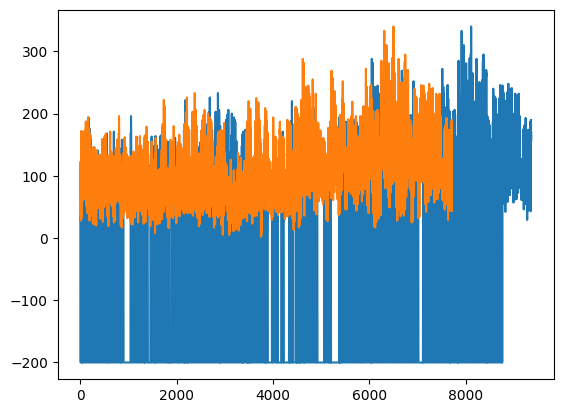

In [47]:
nos = [i for i in df['NO2(GT)'] if i != -200]



plt.plot(df['NO2(GT)'])
plt .plot(nos)
x = adfuller(nos)
print(x[0])
print(x[1])


c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


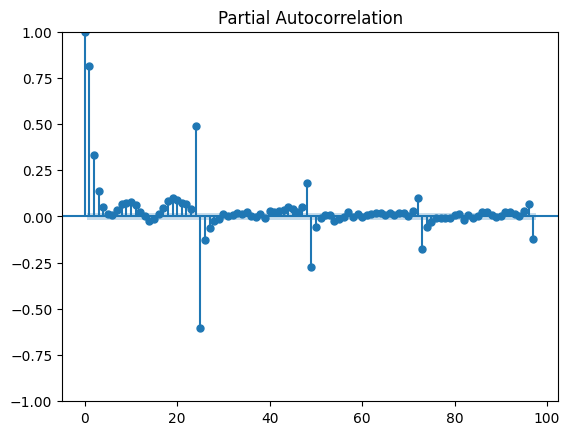

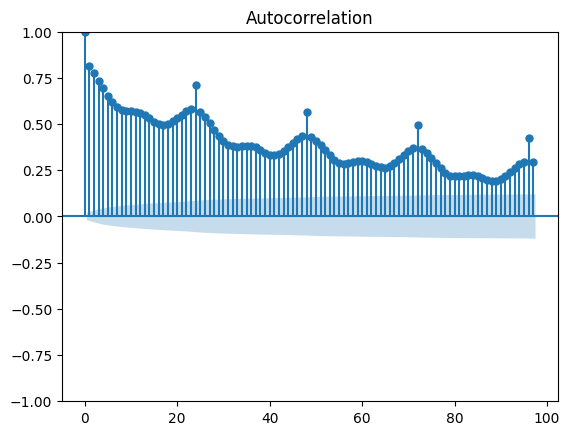

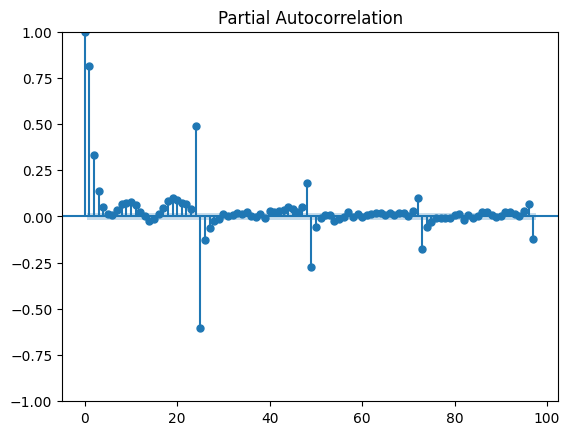

In [16]:
plot_acf(np.array(nos), lags = 97)
plot_pacf(np.array(nos), lags = 97)

In [42]:
missing_indexes = []
not_missing_indexes = []

for a, b in enumerate(df['NO2(GT)']):
    if b == -200:
        missing_indexes.append(a)
    else:
        not_missing_indexes.append(b)
    
print(missing_indexes)
        

[9, 33, 39, 57, 81, 105, 129, 153, 177, 201, 225, 249, 273, 297, 321, 345, 369, 393, 417, 441, 465, 489, 513, 537, 561, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 633, 657, 681, 705, 729, 753, 777, 801, 825, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 873, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

data = seasonal_decompose(x=df['NO2(GT)'], model='additive', period=24)
non_seasonal = data.trend + data.resid

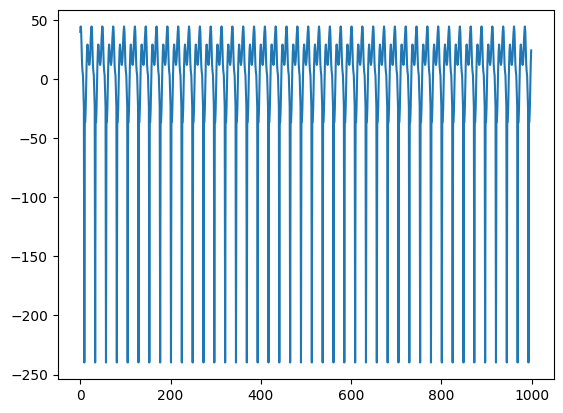

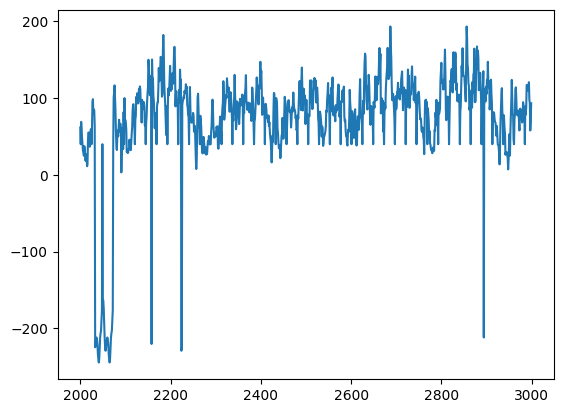

In [43]:

plt.plot(data.seasonal[:1000])
plt.show()
plt.plot(data.trend[2000:3000] + data.resid[2000:3000])
plt.show()



In [ ]:
from scipy.interpolate import interp1d

f = interp1d(not_missing_indexes, nos, fill_value= 'extrapolate')

y_fill = f(missing_indexes)
print(y_fill)
new_data = np.zeros(len(df['NO2(GT)']))

for i in range(len(not_missing_indexes)):
    new_data[not_missing_indexes[i]] = non_seasonal[not_missing_indexes[i]]

for i in range(len(missing_indexes)):
    new_data[missing_indexes[i]] = y_fill[i]

interpd = new_data #+ data.seasonal


ValueError: A value (345.0) in x_new is above the interpolation range's maximum value (340).

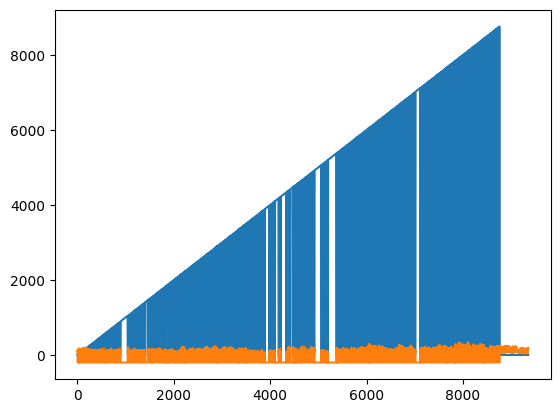

In [41]:
plt.plot(interpd)
plt.plot(df['NO2(GT)'])
plt.show()